In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

from eq_tools import *

In [2]:
radii = [1.0, 0.5] #, 0.2, 0.1] # Outer is always first
#radii = np.arange(1.0,0.05,-0.05)

velocities = [1.0, 0.7]

<IPython.core.display.Javascript object>


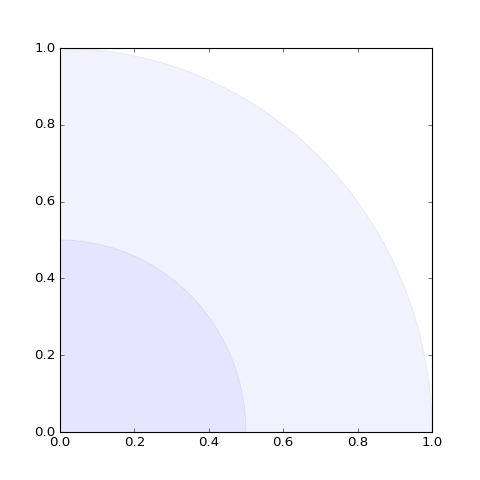

In [3]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
x = draw_earth(radii)

In [ ]:
rel_angle(1,1, 0,1)

In [4]:
vector_representation(3,3,  4,4)

(1.0, 1.0)

In [5]:
intersection(0.0,-1.0, 0.0, -0.9, 0.5)

[array([ 0. ,  0.5]), array([ 0. , -0.5])]

In [6]:
intercept = -1.0
angle = np.pi/2. - np.deg2rad(15.0)
slope = np.tan(angle)
print "ONE"

print slope
x0 = 0.0
y0 = intercept
x = 1.0
y = new_y(x0,y0,x,angle)

rays = []

pts = intersection(x0,y0,x,y,radii[1])
if pts is not None:
    print pts
    closest = None
    if len(pts)==1:
        closest = pts[0]
    if len(pts)>1:
        d0 = mag(x0-pts[0][0],y0-pts[0][1])
        d1 = mag(x0-pts[1][0],y0-pts[1][1])
        if d0<d1:
            closest = pts[0]
        else:
            closest = pts[1]
            
        print "first: ",closest
ray = [[x0,closest[0]],[y0,closest[1]]]
rays.append(ray)
rd0 = radial_pts(closest[0],closest[1])


# Next layer
print "TWO"
vx,vy = vector_representation(ray[0][1],ray[1][1],x0,y0)
cx = ray[0][1] # Circle x
cy = ray[1][1] # Circle y
t0 = rel_angle(cx,cy,vx,vy)

t1 = snells(t0,velocities[0],velocities[1])
norm_angle = rel_angle(cx,cy,1.0, 0.0)
print "norm: ",np.rad2deg(norm_angle)
print "t0: ",np.rad2deg(t0)
print "t1: ",np.rad2deg(t1)
angle -= (t1-t0) # Change in angle is the difference between t0 and t1
#angle = norm_angle - t1
print np.rad2deg(angle)



# Get the new point
x0 = closest[0]
y0 = closest[1]
x = x0 + 1.0
y = new_y(x0,y0,x,angle)

print "pts"
pts = intersection(x0,y0,x,y,radii[1])
if pts is not None:
    print pts
    furthest = None
    if len(pts)==1:
        furthest = pts[0]
    if len(pts)>1:
        d0 = mag(x0-pts[0][0],y0-pts[0][1])
        d1 = mag(x0-pts[1][0],y0-pts[1][1])
        if d0<d1:
            furthest = pts[1]
        else:
            furthest = pts[0]
            
        print furthest
ray[0].append(furthest[0])
ray[1].append(furthest[1])

rd1 = radial_pts(furthest[0],furthest[1])


print ray

# Get to outside layer
print "THREE"
x0 = ray[0][-2]
y0 = ray[1][-2]
x = ray[0][-1]
y = ray[1][-1]
cx = x
cy = y
vx,vy = vector_representation(x0,y0, x,y)
t0 = rel_angle(-cx,-cy,-vx,-vy)
t1 = snells(t0,velocities[1],velocities[0])
radial_angle = rel_angle(1.0, 0.0, cx,cy)
print "radial angle: ",np.rad2deg(radial_angle)
print "t0: ",np.rad2deg(t0)
print "t1: ",np.rad2deg(t1)
print t0,t1
#angle += (t0-t1)
angle = radial_angle+t1
print np.rad2deg(angle)


x1 = x + 1
y1 = new_y(x,y,x1,angle)

pts = intersection(x,y,x1,y1,radii[0])
if pts is not None:
    print pts
    closest = None
    if len(pts)==1:
        closest = pts[0]
    if len(pts)>1:
        d0 = mag(x-pts[0][0],y-pts[0][1])
        d1 = mag(x-pts[1][0],y-pts[1][1])
        if d0<d1:
            closest = pts[0]
        else:
            closest = pts[1]
            
        print closest

ray[0].append(closest[0])
ray[1].append(closest[1])

ONE
3.73205080757
[array([ 0.36072275,  0.34623561]), array([ 0.13927725, -0.48021021])]
first:  [ 0.13927725 -0.48021021]
TWO
norm:  73.8260478039
t0:  31.1739521961
t1:  21.2443827619
84.9295694342
pts
[array([ 0.22165148,  0.44818592]), array([ 0.13927725, -0.48021021])]
[ 0.22165148  0.44818592]
[[0.0, 0.13927725428276039, 0.22165147740882546], [-1.0, -0.48021021067804798, 0.44818592410124281]]
THREE
radial angle:  63.6851866723
t0:  21.2443827619
t1:  31.1739521961
0.370784426749 0.544088106682
94.8591388685
[array([ 0.17606879,  0.98437786]), array([ 0.33970889, -0.94053063])]
[ 0.17606879  0.98437786]


<IPython.core.display.Javascript object>


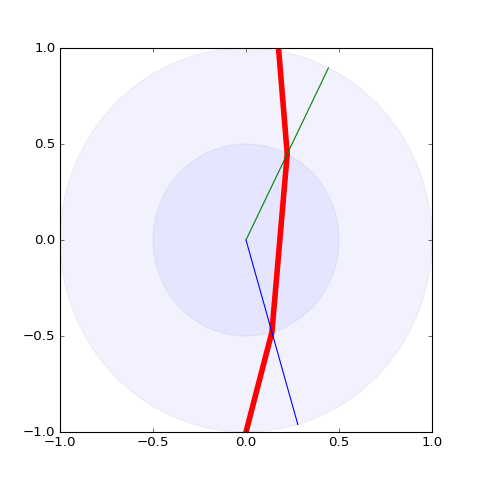

In [7]:
fig = plt.figure(figsize=(6,6))
draw_earth(radii)
plt.plot(ray[0],ray[1],'r-',linewidth=5)
plt.plot([0,rd0[0]],[0.0,rd0[1]])
plt.plot([0,rd1[0]],[0.0,rd1[1]])

#plt.plot([0, 0.04391337],[0, -0.49806788])
#plt.plot([0, 0.29225], [0, 0.4057])

In [ ]:
rays = []

for a in [5.0, 10.0, 15.0, 20.0,25.0, 27.0]:
    intercept = -1.0
    angle = np.pi/2. - np.deg2rad(a)
    slope = np.tan(angle)
    print "ONE"

    print slope
    x0 = 0.0
    y0 = intercept
    x = 1.0
    y = new_y(x0,y0,x,angle)

    pts = intersection(x0,y0,x,y,radii[1])
    if pts is not None:
        print pts
        closest = None
        if len(pts)==1:
            closest = pts[0]
        if len(pts)>1:
            d0 = mag(x0-pts[0][0],y0-pts[0][1])
            d1 = mag(x0-pts[1][0],y0-pts[1][1])
            if d0<d1:
                closest = pts[0]
            else:
                closest = pts[1]

            print "first: ",closest
    ray = [[x0,closest[0]],[y0,closest[1]]]
    rd0 = radial_pts(closest[0],closest[1])


    # Next layer
    print "TWO"
    vx,vy = vector_representation(ray[0][1],ray[1][1],x0,y0)
    cx = ray[0][1] # Circle x
    cy = ray[1][1] # Circle y
    t0 = rel_angle(cx,cy,vx,vy)

    t1 = snells(t0,velocities[0],velocities[1])
    norm_angle = rel_angle(cx,cy,1.0, 0.0)
    print "norm: ",np.rad2deg(norm_angle)
    print "t0: ",np.rad2deg(t0)
    print "t1: ",np.rad2deg(t1)
    angle -= (t1-t0) # Change in angle is the difference between t0 and t1
    #angle = norm_angle - t1
    print np.rad2deg(angle)



    # Get the new point
    x0 = closest[0]
    y0 = closest[1]
    x = x0 + 1.0
    y = new_y(x0,y0,x,angle)

    print "pts"
    pts = intersection(x0,y0,x,y,radii[1])
    if pts is not None:
        print pts
        furthest = None
        if len(pts)==1:
            furthest = pts[0]
        if len(pts)>1:
            d0 = mag(x0-pts[0][0],y0-pts[0][1])
            d1 = mag(x0-pts[1][0],y0-pts[1][1])
            if d0<d1:
                furthest = pts[1]
            else:
                furthest = pts[0]

            print furthest
    ray[0].append(furthest[0])
    ray[1].append(furthest[1])

    rd1 = radial_pts(furthest[0],furthest[1])


    print ray

    # Get to outside layer
    print "THREE"
    x0 = ray[0][-2]
    y0 = ray[1][-2]
    x = ray[0][-1]
    y = ray[1][-1]
    cx = x
    cy = y
    vx,vy = vector_representation(x0,y0, x,y)
    t0 = rel_angle(-cx,-cy,-vx,-vy)
    t1 = snells(t0,velocities[1],velocities[0])
    radial_angle = rel_angle(1.0, 0.0, cx,cy)
    print "radial angle: ",np.rad2deg(radial_angle)
    print "t0: ",np.rad2deg(t0)
    print "t1: ",np.rad2deg(t1)
    print t0,t1
    #angle += (t0-t1)
    angle = radial_angle+t1
    print np.rad2deg(angle)


    x1 = x + 1
    y1 = new_y(x,y,x1,angle)

    pts = intersection(x,y,x1,y1,radii[0])
    if pts is not None:
        print pts
        closest = None
        if len(pts)==1:
            closest = pts[0]
        if len(pts)>1:
            d0 = mag(x-pts[0][0],y-pts[0][1])
            d1 = mag(x-pts[1][0],y-pts[1][1])
            if d0<d1:
                closest = pts[0]
            else:
                closest = pts[1]

            print closest

    ray[0].append(closest[0])
    ray[1].append(closest[1])
    
    rays.append(ray)

<IPython.core.display.Javascript object>


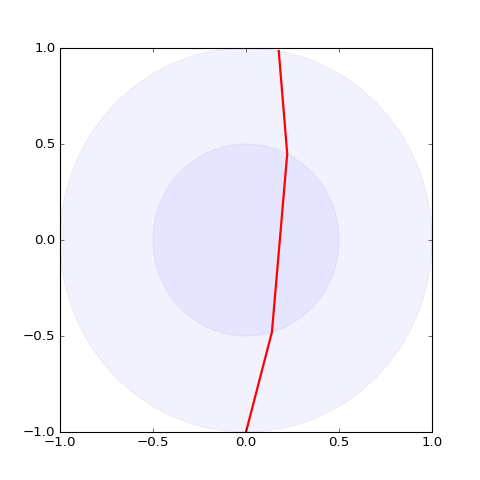

In [8]:
fig = plt.figure(figsize=(6,6))
draw_earth(radii)
for ray in rays:
    plt.plot(ray[0],ray[1],'r-',linewidth=2)
#plt.plot([0,rd0[0]],[0.0,rd0[1]])
#plt.plot([0,rd1[0]],[0.0,rd1[1]])


In [ ]:
rays

0.0895903111323 0.491908097261 1.63621092431


<IPython.core.display.Javascript object>


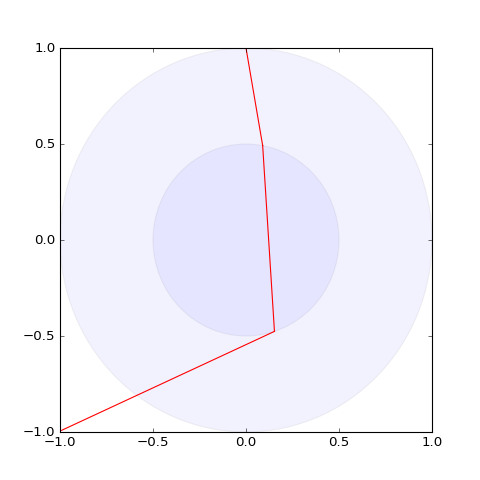

In [9]:
radii = [1.0, 0.5]
velocities = [1.0, 0.7]

rays = []
#ray = [[0.0, 1.0],[1.0, new_y(0,1,1,np.deg2rad(-85.))]]
#rays.append(ray)

origin = [0.0, 1.0]

#angles = [-87., -85., -80., -75., -70., -65]
angles = [-80.]

for a in angles:
    x,y,angle = trace_to_radius(origin[0],origin[1], np.deg2rad(a), radii[0],radii[1], velocities[0], velocities[1])
    print x,y,angle

    ray = [[origin[0],x],[origin[1],y]]
    rays.append(ray)
    
    #print "ANGLE: ",angle,np.deg2rad
    x1,y1,angle1 = trace_to_radius(x,y, angle, radii[1],radii[1],velocities[1], velocities[0])
    
    ray = [[x,x1],[y,y1]]
    rays.append(ray)
    
    x2,y2,angle2 = trace_to_radius(x1,y1, angle1, radii[1],radii[0],velocities[1], velocities[0])
    
    ray = [[x1,y2],[y1,y2]]
    rays.append(ray)

plt.figure(figsize=(6,6))
draw_earth(radii)
for ray in rays:
    plt.plot(ray[0],ray[1],'r-',linewidth=1)



In [ ]:
np.deg2rad(-73)

<IPython.core.display.Javascript object>


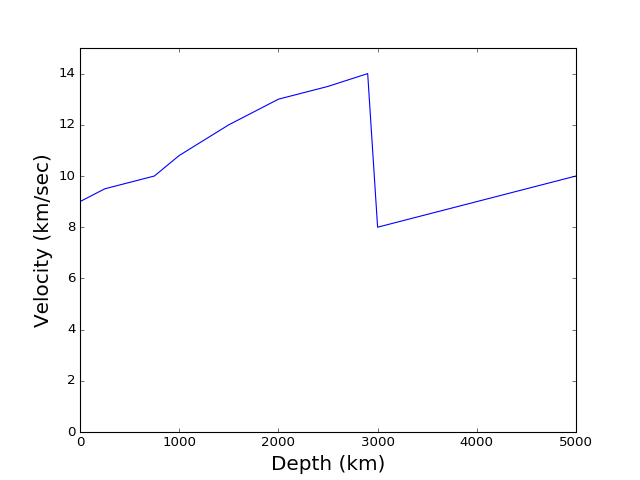

In [10]:
depth = [0, 250, 500, 750, 1000, 1500, 2000, 2500, 2900, 3000, 5000]
v = [9, 9.5, 9.75, 10, 10.8, 12, 13, 13.5, 14.0, 8 , 10]

plt.figure()
plt.plot(depth, v)
plt.ylim(0,15)
plt.xlabel("Depth (km)",fontsize=18)
plt.ylabel("Velocity (km/sec)",fontsize=18)

In [ ]:
radii